   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
  

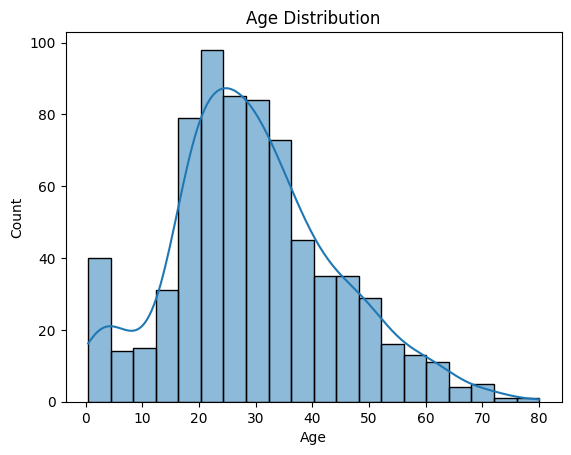

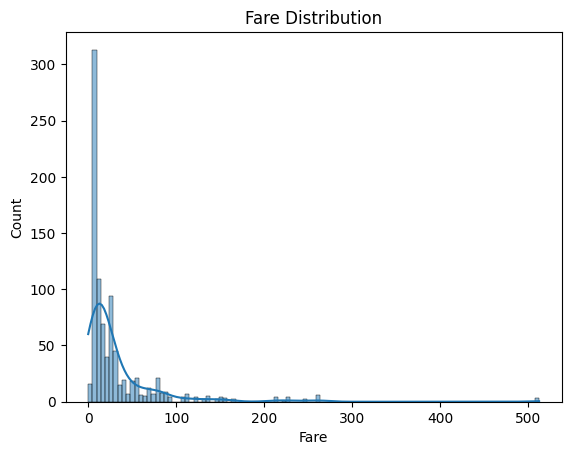

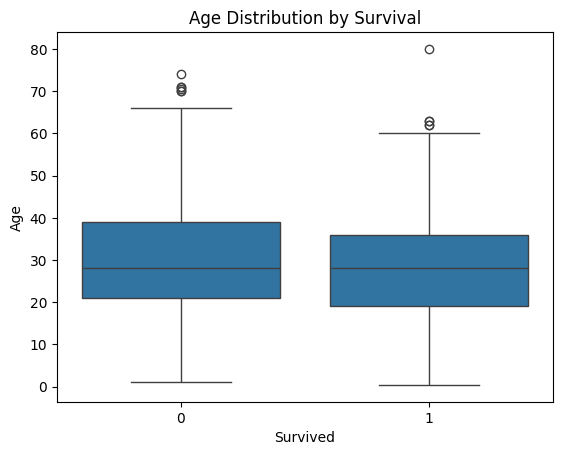

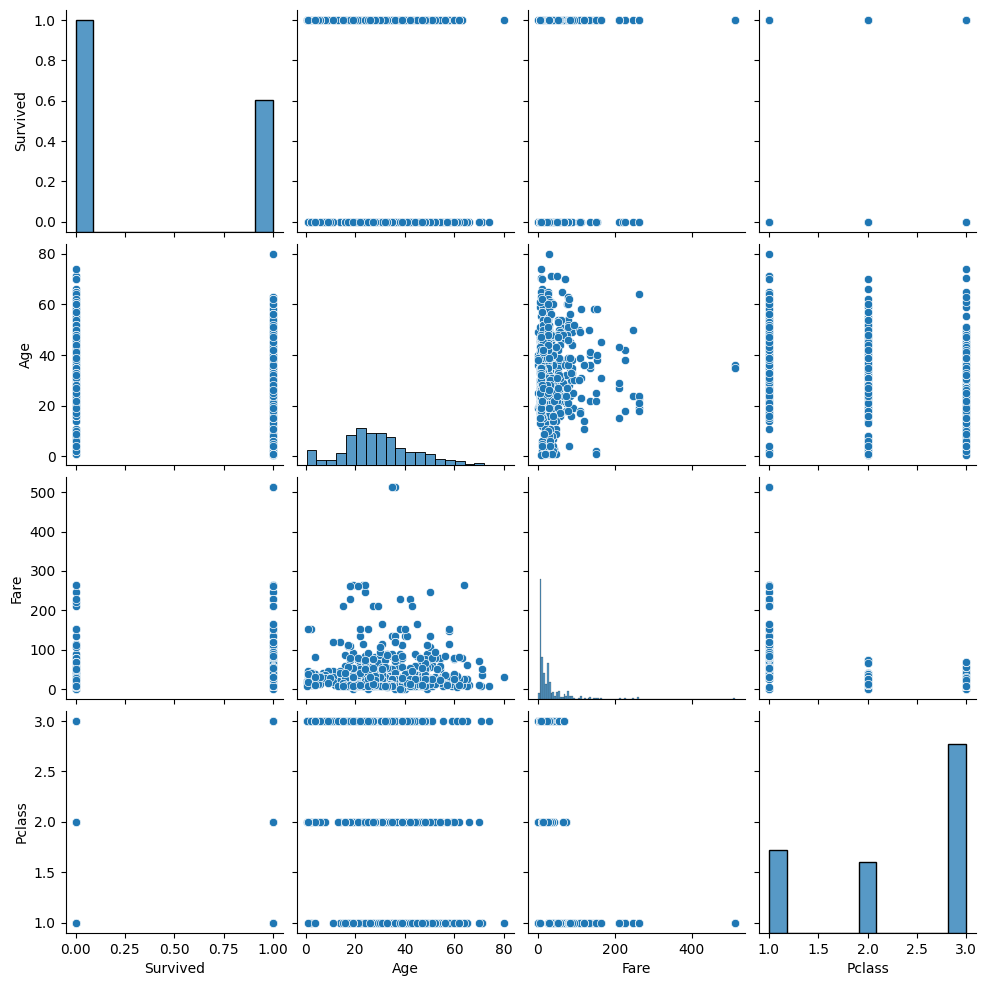

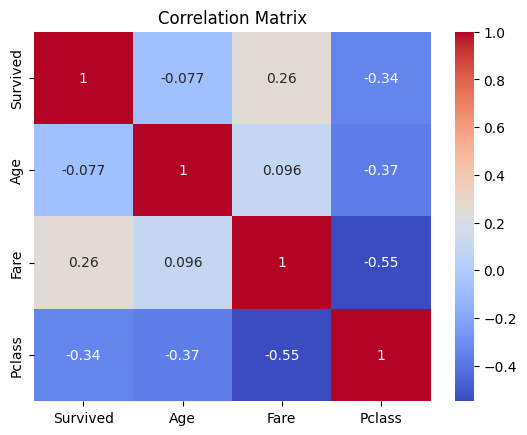

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

train_data = pd.read_csv('/content/Titanic_train.csv')
test_data = pd.read_csv('/content/Titanic_test.csv')

print(train_data.head())
print(test_data.head())
print(train_data.info())
print(train_data.describe())

sns.histplot(train_data['Age'].dropna(), kde=True)
plt.title('Age Distribution')
plt.show()

sns.histplot(train_data['Fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()


sns.boxplot(x='Survived', y='Age', data=train_data)
plt.title('Age Distribution by Survival')
plt.show()

sns.pairplot(train_data[['Survived', 'Age', 'Fare', 'Pclass']])
plt.show()

corr = train_data[['Survived', 'Age', 'Fare', 'Pclass']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [18]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)
train_data['Sex'] = train_data['Sex'].map({'male': 0, 'female': 1})
train_data['Embarked'] = train_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})
X_train = train_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]
y_train = train_data['Survived']
X_test = test_data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]


<ipython-input-18-05c42aefec3f>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['Age'].fillna(train_data['Age'].median(), inplace=True)
<ipython-input-18-05c42aefec3f>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [19]:
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train_split, y_train_split)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Accuracy: 0.8100558659217877
Precision: 0.7857142857142857
Recall: 0.7432432432432432
F1 Score: 0.7638888888888888
ROC-AUC: 0.8823680823680824


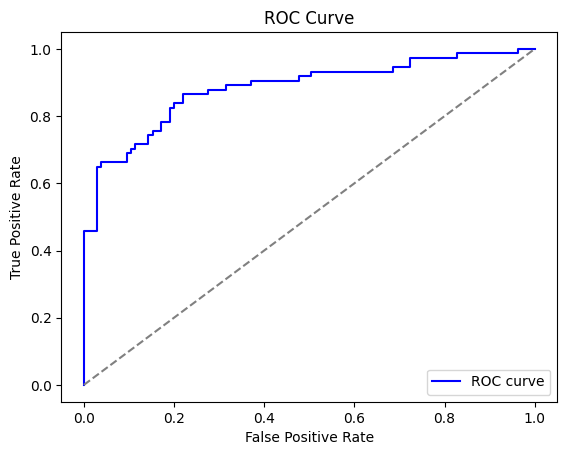

In [20]:
y_pred = model.predict(X_val_split)
accuracy = accuracy_score(y_val_split, y_pred)
precision = precision_score(y_val_split, y_pred)
recall = recall_score(y_val_split, y_pred)
f1 = f1_score(y_val_split, y_pred)
roc_auc = roc_auc_score(y_val_split, model.predict_proba(X_val_split)[:, 1])
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC-AUC: {roc_auc}')
fpr, tpr, thresholds = roc_curve(y_val_split, model.predict_proba(X_val_split)[:, 1])
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [21]:
coefficients = pd.DataFrame(model.coef_.flatten(), X_train.columns, columns=['Coefficient'])
print(coefficients)
print("Features with the highest impact:")
print(coefficients.sort_values(by='Coefficient', ascending=False))


          Coefficient
Pclass      -0.931117
Sex          2.596974
Age         -0.030441
SibSp       -0.294342
Parch       -0.111504
Fare         0.002533
Embarked    -0.218226
Features with the highest impact:
          Coefficient
Sex          2.596974
Fare         0.002533
Age         -0.030441
Parch       -0.111504
Embarked    -0.218226
SibSp       -0.294342
Pclass      -0.931117
